# WITH PANDAS AND MATPLOTLIB

In [34]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [35]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [36]:
kill.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2113,2356,Christopher Carter,19/02/17,shot,knife,27.0,M,B,Kent,OH,False,attack,Not fleeing,False
2245,2502,Charles Spands,14/04/17,shot,gun,35.0,M,W,Spanaway,WA,False,other,Car,False
1358,1543,Garry Conrad,18/05/16,shot,knife,46.0,M,W,New York,NY,True,other,Not fleeing,False
2501,2786,Daniel Thomas Reid,18/07/17,shot,gun,32.0,M,W,Clay,AL,False,attack,Not fleeing,False
526,664,Pierre Gabriel Koellner,16/07/15,shot,gun,29.0,M,W,Opp,AL,False,attack,Foot,False


In [37]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [38]:
kill.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


## 1: Plot number of people by gender

In [39]:
gender_counts= kill["gender"].value_counts()
gender_counts

M    2428
F     107
Name: gender, dtype: int64

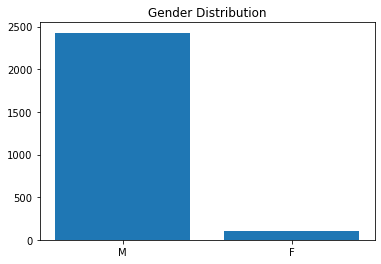

In [40]:
# with matplotlib
#functional

plt.figure()

plt.title("Gender Distribution")
plt.bar(kill.gender.unique() ,gender_counts)

plt.show()


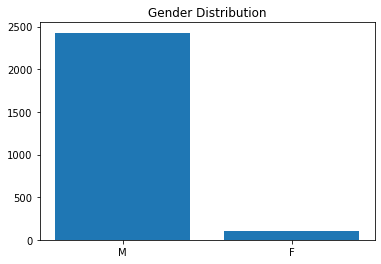

In [41]:
# with matplotlib
#OOM
fig, ax = plt.subplots()

ax.bar(kill.gender.unique() ,gender_counts)

ax.set_title("Gender Distribution")

plt.show()

## 2: Plot 7 most common kill weapons

In [91]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [42]:
kill_weapon= kill["armed"].value_counts().nlargest(7)
kill_weapon

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [43]:
kill_weapon.dtypes

dtype('int64')

In [44]:
kill_weapon.index

Index(['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon',
       'machete'],
      dtype='object')

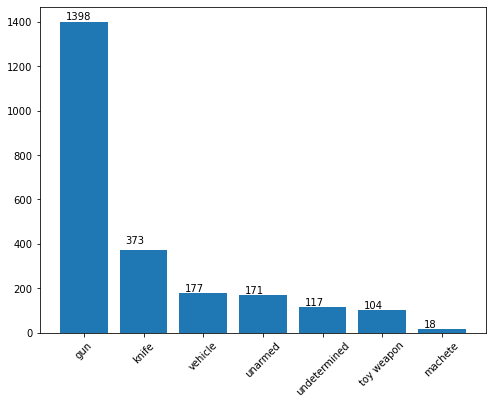

In [45]:
#functional

plt.figure(figsize= (8,6))

plt.bar(kill_weapon.index ,kill_weapon)
plt.text(-0.3,1410, "1398")
plt.text(0.7,400, "373")
plt.text(1.7,185, "177")
plt.text(2.7,175, "171")
plt.text(3.7,121, "117")
plt.text(4.7,110, "104")
plt.text(5.7,22, "18")
plt.xticks(kill_weapon.index,kill_weapon.index, rotation=45)


plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [47]:
kill.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1712,1919,Christopher Sowell,28/09/16,shot,undetermined,32.0,M,B,Philadelphia,PA,False,attack,Not fleeing,False
1140,1309,Angel Alan Gleason,23/02/16,shot,gun,36.0,M,H,Ripon,CA,False,other,Other,False
1980,2223,Darrion Barnhill,10/01/17,shot and Tasered,unarmed,23.0,M,B,Reagan,TN,False,attack,Not fleeing,False
503,634,Javon Hawkins,09/07/15,shot,sword,21.0,M,B,Kansas City,MO,False,other,Not fleeing,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False


In [48]:
kill["age"].isnull().sum()
# nan degerler toplamı.

77

In [49]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [50]:
kill["age_cat"] =kill["age"].transform(lambda x: 'above25' if x > 25 else 'below25' )
kill["age_cat"]

0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531    below25
2532    above25
2533    above25
2534    above25
Name: age_cat, Length: 2535, dtype: object

In [51]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [52]:
kill["age_cat"].count()

2535

In [53]:
x = kill["age_cat"].value_counts()
x

above25    1905
below25     630
Name: age_cat, dtype: int64

In [54]:
y =kill["age_cat"].unique()
y

array(['above25', 'below25'], dtype=object)

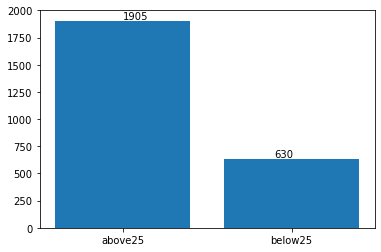

In [55]:
#functional

plt.figure()

plt.bar(y ,x)
plt.text(0,1915, "1905")
plt.text(0.9,645, "630")

plt.show()


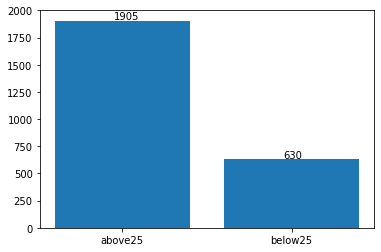

In [ ]:
# with matplotlib


## 4: Plot number of killed poeple by race

In [56]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [57]:
a= kill["race"].value_counts()
a

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [58]:
b =kill["race"].value_counts().index
b

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

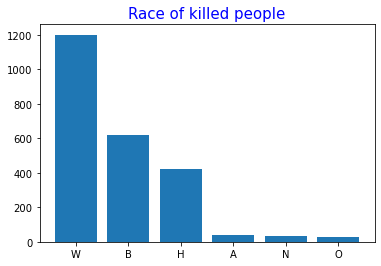

In [59]:
#OOM
fig, ax = plt.subplots()

ax.bar(b,a)

ax.set_title("Race of killed people", color="b",fontsize="15")

plt.show()

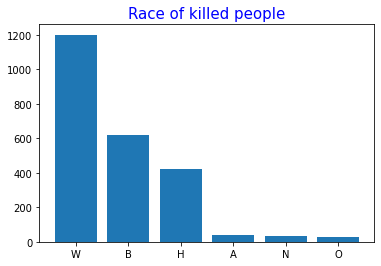

In [ ]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

In [60]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [61]:
kill["race"].unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [ ]:
#istenen output

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [62]:
kill["race"].astype(str).value_counts()

W      1201
B       618
H       423
nan     195
A        39
N        31
O        28
Name: race, dtype: int64

In [197]:
#istenen output


W      1201
B       618
H       423
nan     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [63]:
kill.shape

(2535, 15)

In [64]:
kill["race"]

0         A
1         W
2         H
3         W
4         H
       ... 
2530    NaN
2531    NaN
2532    NaN
2533      B
2534      B
Name: race, Length: 2535, dtype: object

In [65]:
kill["race"].isnull().sum()

195

In [66]:
kill.dropna(axis= 0, how="any", inplace =True)

In [67]:
#kill.dropna(axis= 0, how="any", inplace =True, subset =["race"])sadece race sütununu siler.


In [68]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [22]:
t=kill["race"].value_counts()
t

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [69]:
labels =kill["race"].value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [70]:
y=kill["race"].value_counts().values
y

array([1168,  592,  401,   36,   29,   28], dtype=int64)

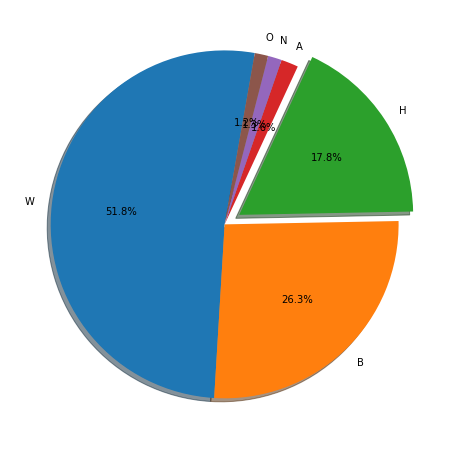

In [71]:
# matplotlib
plt.figure(figsize=(10, 8))

myexplode = [0, 0, 0.1, 0, 0, 0]
plt.pie(y, labels = labels, explode=myexplode ,  startangle=80 ,shadow= True, autopct="%0.1f%%")

#plt.legend()  renklerin kartelasını gösteriyor
plt.show()
